In [1]:
library(dplyr)
library(ggplot2)
library(knitr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data<-read.csv("/Users/julialeonard/Desktop/kids/Motion/RESULTS_age/SummaryRsqs.csv",header = TRUE, sep = ",")
head(data)
attach(data)

,motion_thresh,med_rsq,CI_95,n,age_l,age_u,med_age_motion_r_a,med_age_motion_p_a,med_age_motion_r_b,med_age_motion_p_b
1,5.00000000,-1.08818020,2.53923699,10.00000000,6.00000000,18.00000000,-0.05464320,0.60470412,-0.09759019,0.48900022
2,5.00000000,-1.07671845,2.26733570,20.00000000,6.00000000,18.00000000,-0.02542051,0.51605836,-0.07895138,0.55132875
3,5.00000000,-1.02411363,1.78520930,30.00000000,6.00000000,18.00000000,-0.04485077,0.57809536,-0.08813239,0.48381134
4,5.00000000,-0.98062563,1.78937125,40.00000000,6.00000000,18.00000000,-0.05480698,0.53198011,-0.03998944,0.56319316
5,5.00000000,-0.86775347,1.86124838,50.00000000,6.00000000,18.00000000,-0.05898685,0.54687813,-0.05974059,0.52639858
6,5.00000000,-0.89094766,1.97098705,60.00000000,6.00000000,18.00000000,-0.05730851,0.52847308,-0.07630537,0.44045100


In [3]:
table(data$motion_thresh) 


 5 10 15 20 25 30 35 40 45 50 
10 10 10 10 10 10 10 10 10 10 

In [4]:
table(data$n)


 10  20  30  40  50  60  70  80  90 100 
 10  10  10  10  10  10  10  10  10  10 

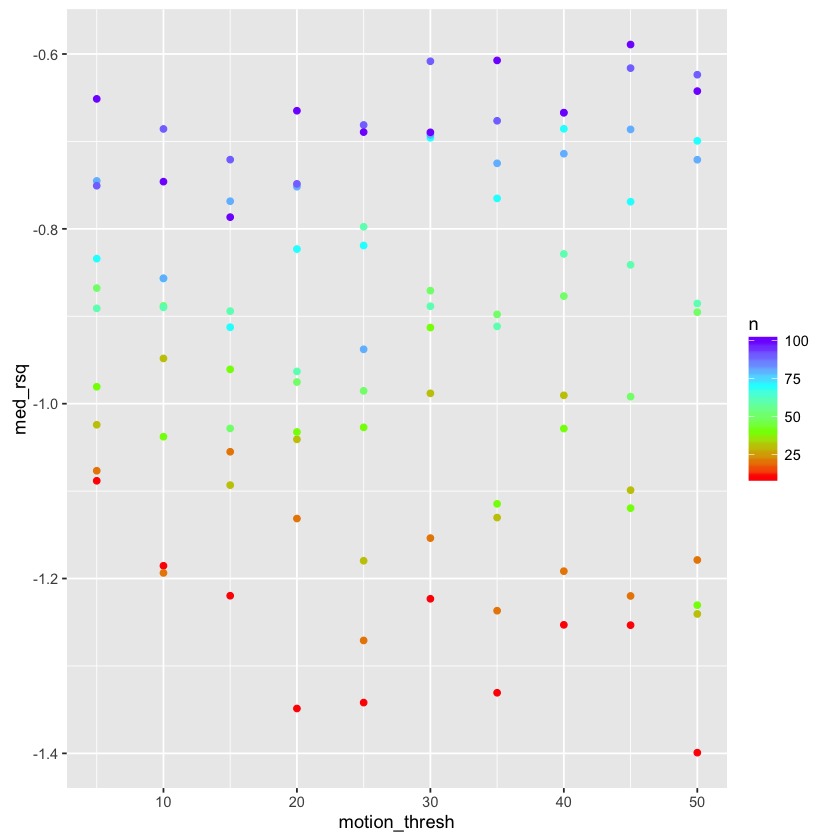

In [5]:
ggplot(data, aes(x=motion_thresh, y=med_rsq, group=n, color=n))+geom_point() +scale_colour_gradientn(colours=rainbow(4))

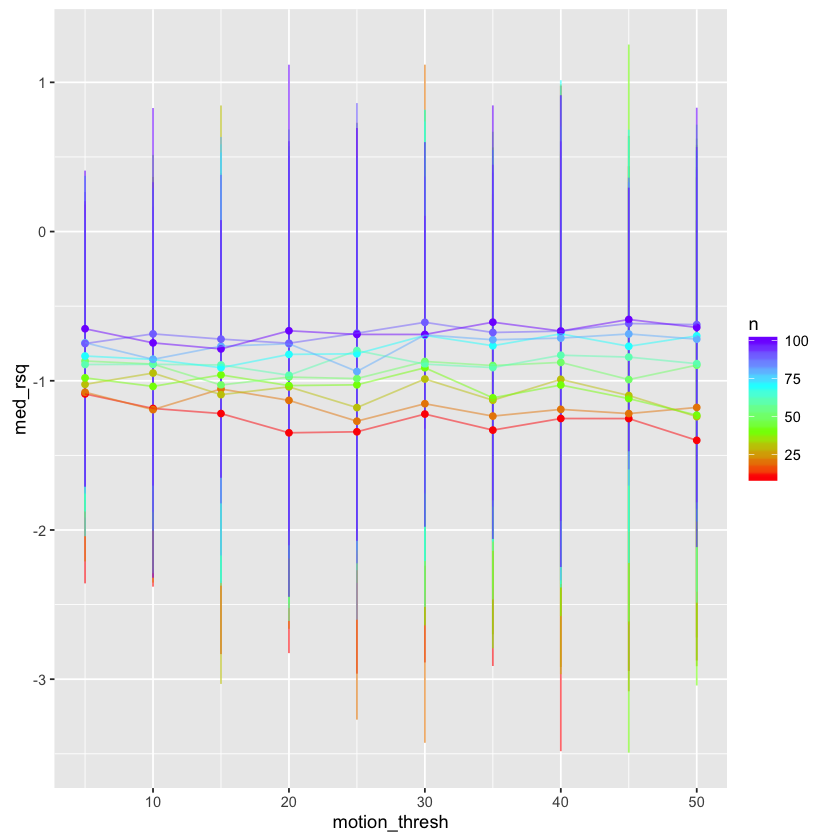

In [6]:
ggplot(data, aes(x=motion_thresh, y=med_rsq, group=n, color=n)) +scale_colour_gradientn(colours=rainbow(4))+
geom_errorbar(aes(ymin=med_rsq-CI_95/2, 
			  ymax=med_rsq+CI_95/2), 
		      width=0, alpha=.6)+geom_point()+
		geom_line(alpha=.5)


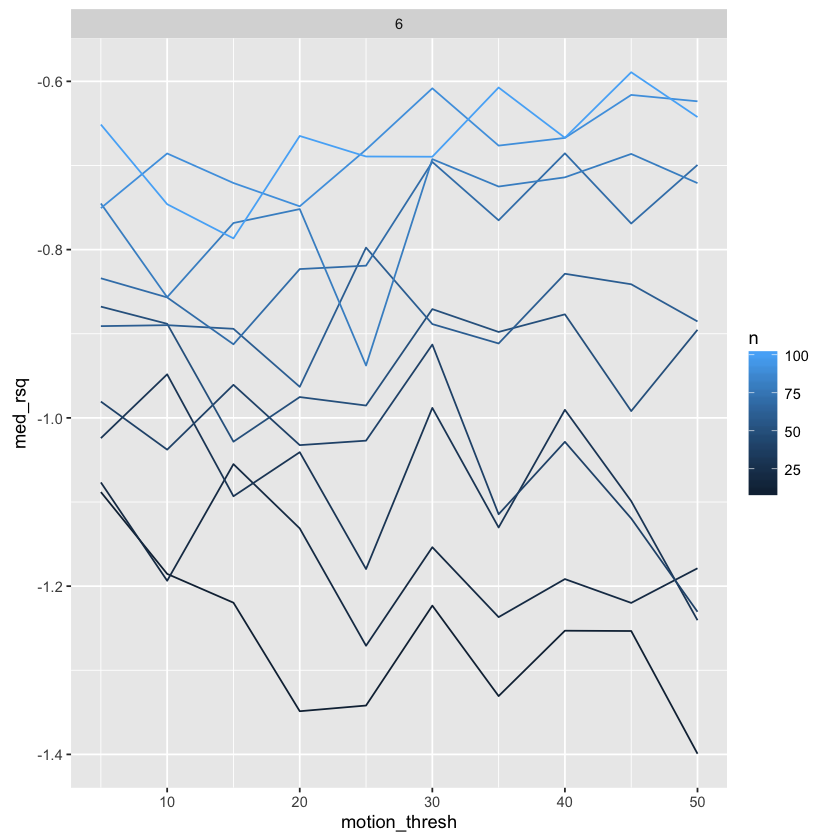

In [7]:
ggplot(data, aes(x=motion_thresh, y=med_rsq, group=n, color=n))+geom_line()+facet_grid(~age_l)

## age and motion correlations?

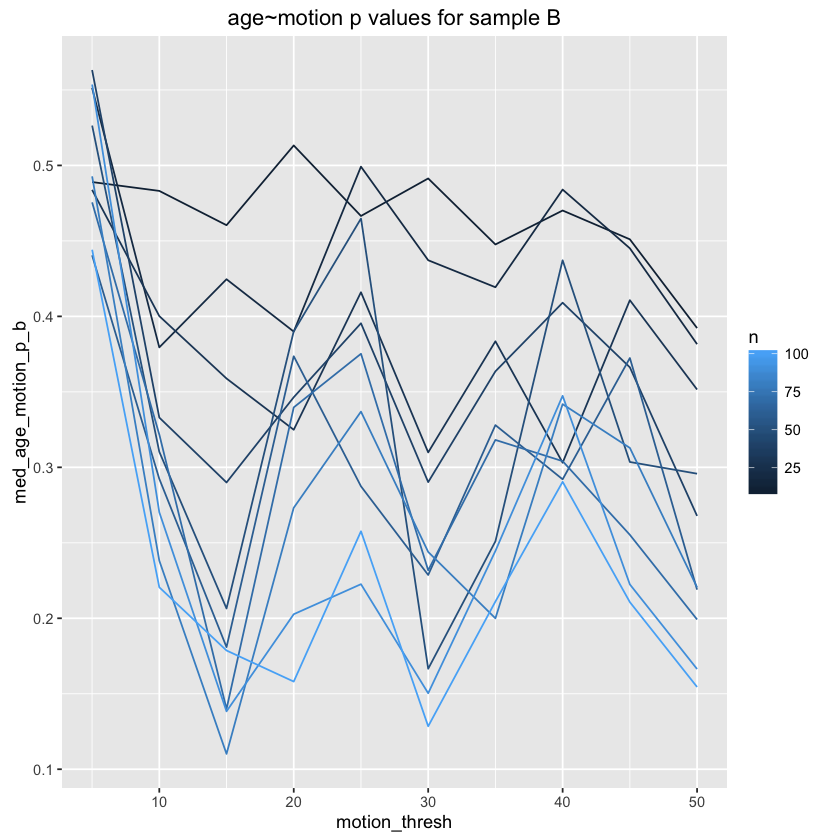

In [13]:
ggplot(data, aes(x=motion_thresh, y=med_age_motion_p_b, group=n, color=n))+geom_line() + labs(title = "age~motion p values for sample B")

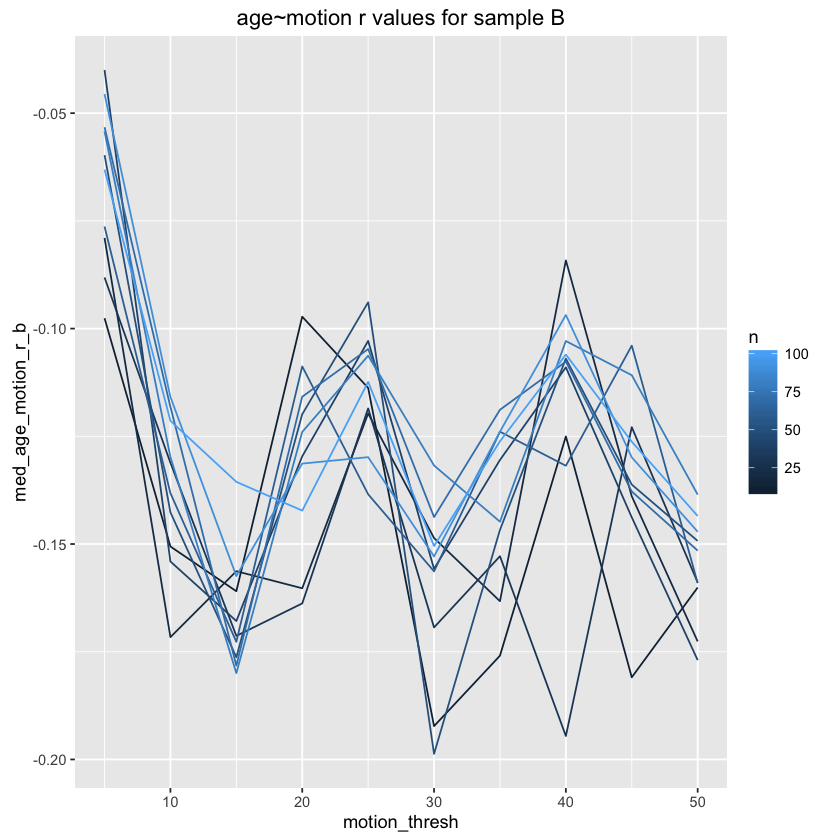

In [16]:
ggplot(data, aes(x=motion_thresh, y=med_age_motion_r_b, group=n, color=n))+geom_line()+ labs(title = "age~motion r values for sample B")

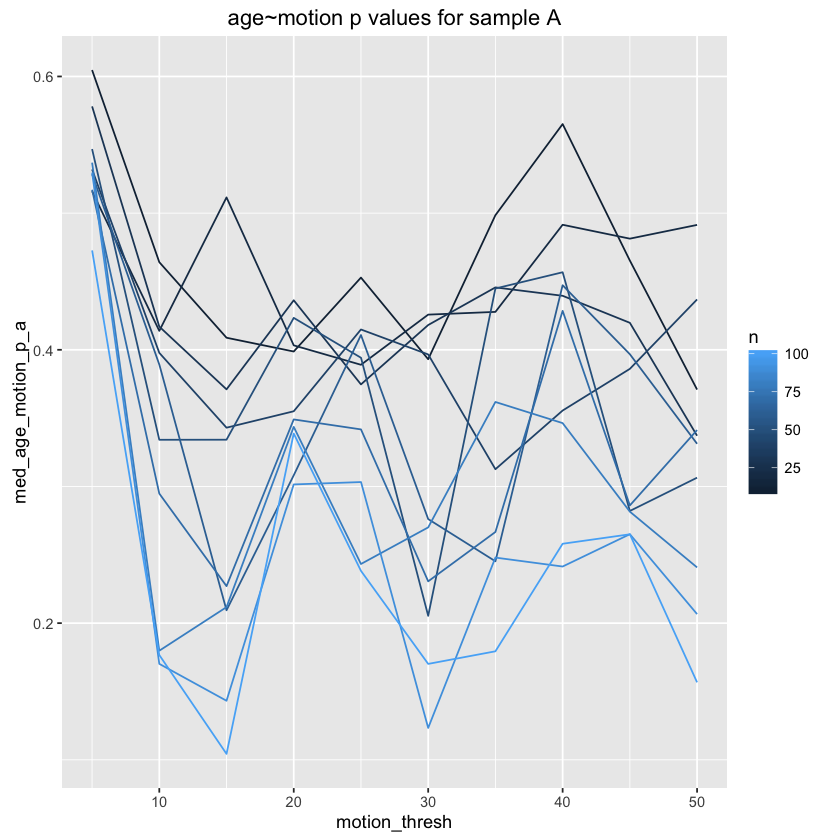

In [14]:
ggplot(data, aes(x=motion_thresh, y=med_age_motion_p_a, group=n, color=n))+geom_line()+ labs(title = "age~motion p values for sample A")

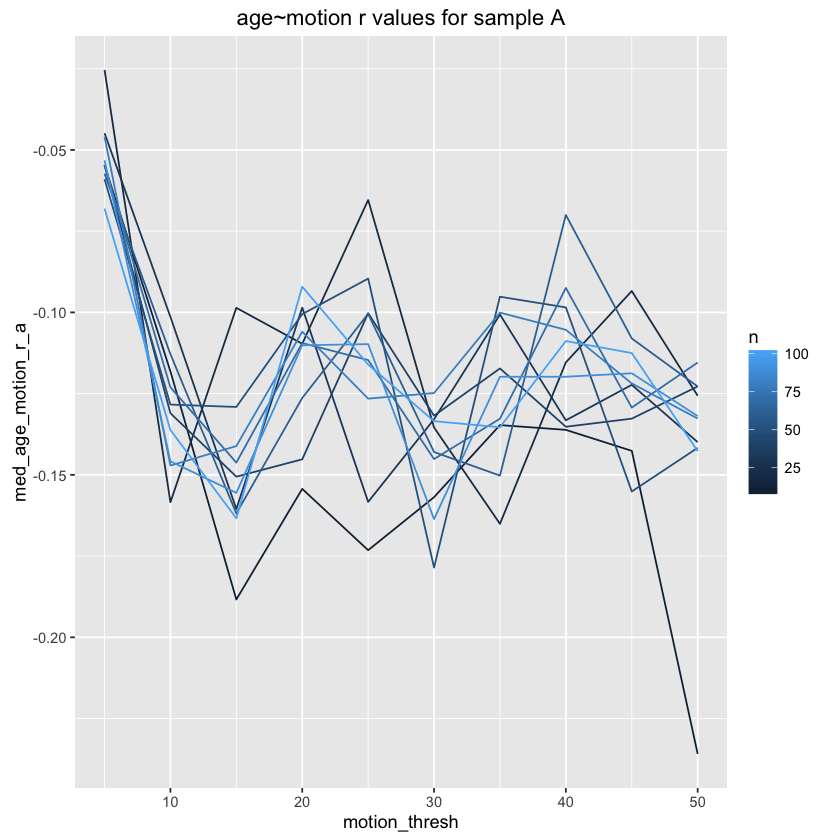

In [15]:
ggplot(data, aes(x=motion_thresh, y=med_age_motion_r_a, group=n, color=n))+geom_line()+ labs(title = "age~motion r values for sample A")

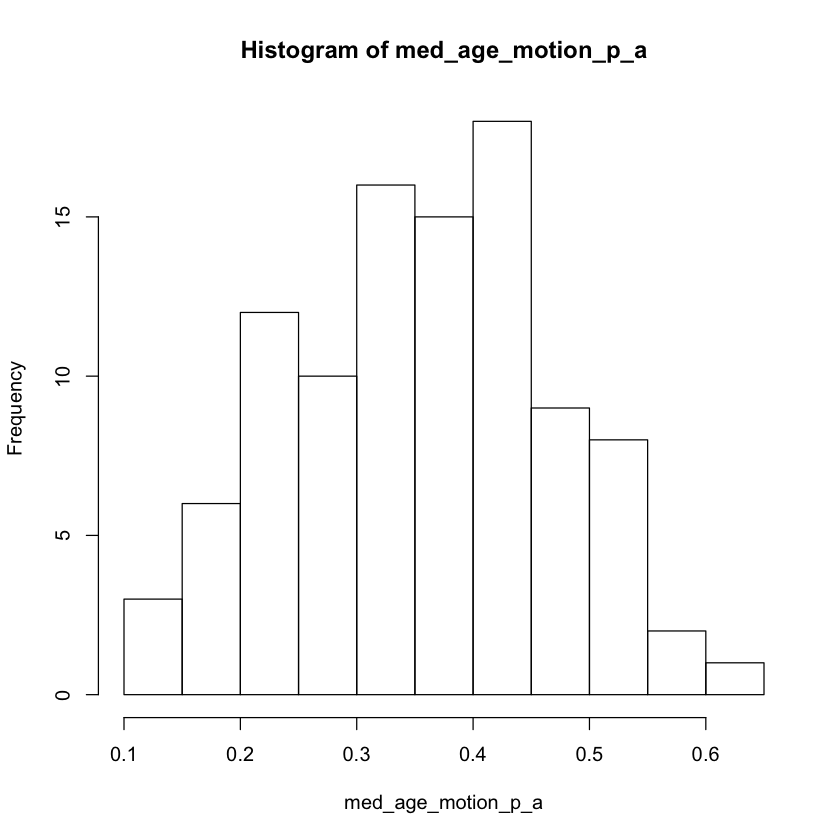

In [19]:
hist(med_age_motion_p_a) #doesn't look like they are correlated

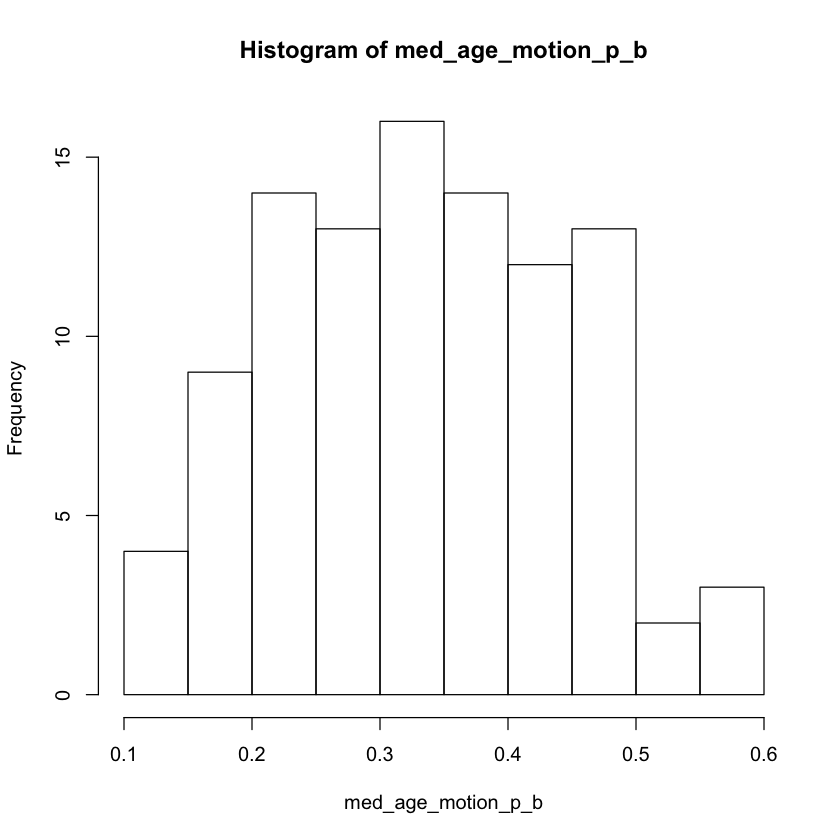

In [20]:
hist(med_age_motion_p_b) #doesn't look like they are correlated

In [21]:
## Are age and perc_fd correlated in general in this sample?

In [22]:
data<- read.csv('/Users/julialeonard/Desktop/Phenotypic_V1_0b_preprocessed1.csv')
k <-data$AGE_AT_SCAN < 19
kids<-data[k,]

Warning message:
: Removed 13 rows containing non-finite values (stat_smooth).Warning message:
: Removed 13 rows containing missing values (geom_point).

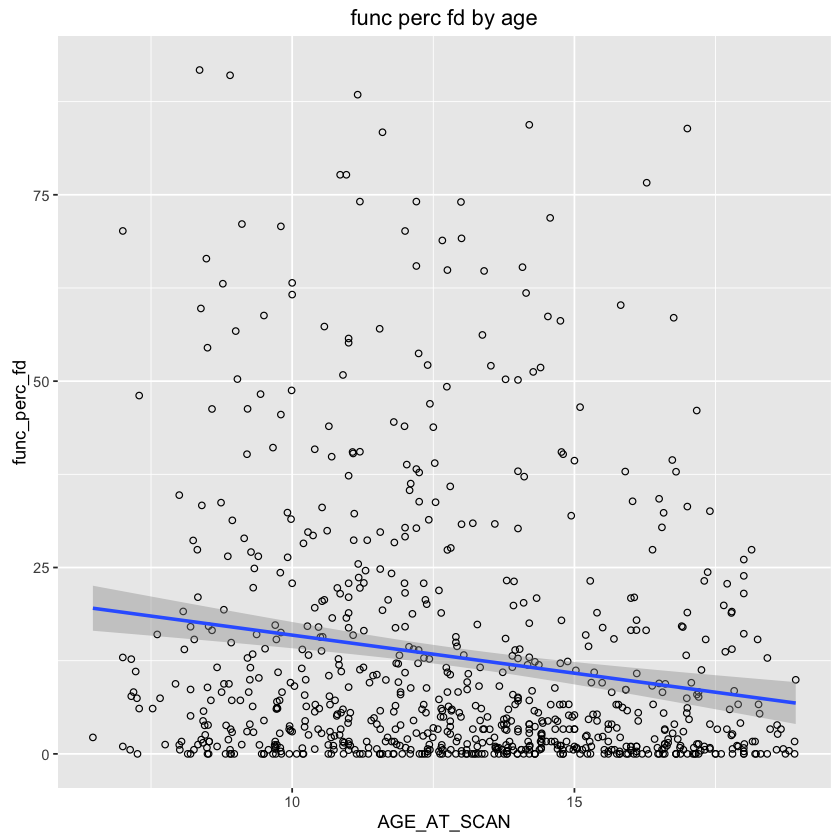

In [25]:
ggplot(kids, aes(x=AGE_AT_SCAN, y=func_perc_fd)) +geom_point(shape=1) +   geom_smooth(method=lm)+
  labs(title = "func perc fd by age")

In [26]:
cor.test(kids$AGE_AT_SCAN,kids$func_num_fd) #sig...so im confused by above results...maybe I did something wrong?


	Pearson's product-moment correlation

data:  kids$AGE_AT_SCAN and kids$func_num_fd
t = -3.4417, df = 778, p-value = 0.000609
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.19101677 -0.05271668
sample estimates:
       cor 
-0.1224612 
